In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
train = pd.read_excel('Moviles.xlsx')
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,No,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,Si,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,Si,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,No,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,No,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,Si,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,Si,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,Si,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,No,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [86]:
train[['ram','price_range']].head()

,ram,price_range
0,2549,1
1,2631,2
2,2603,2
3,2769,2
4,1411,1


<AxesSubplot:xlabel='ram', ylabel='price_range'>

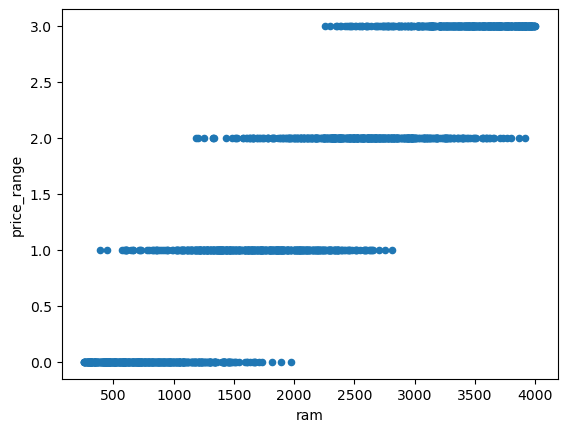

In [87]:
train[['ram','price_range']].plot.scatter(x='ram',y='price_range')

In [120]:
#creacion De Parametros
w=0.01
b=-1.66

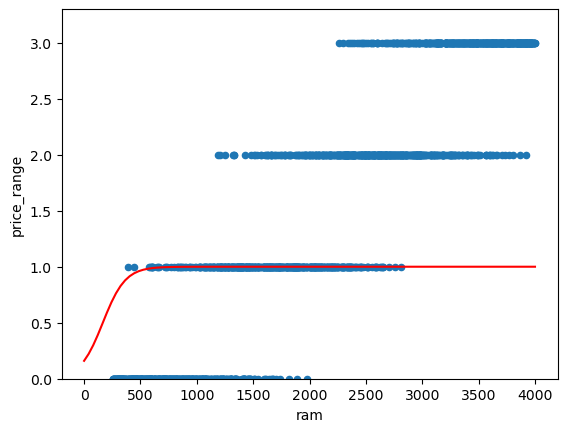

In [121]:

#Punto De La Recta
x = np.linspace(0,train['ram'].max(),100)
y= 1/(1+np.exp(-(w*x+b)))

#Grafica De La Recta
train.plot.scatter(x='ram',y='price_range')
plt.plot(x,y, '-r')
plt.ylim(0,train['price_range'].max()*1.1)
plt.show()

In [104]:
train['sigmoid'] = 1/(1+np.exp(-(train['price_range']*w+b)))

# calculo de la funcion de error
train['loss_xi'] = -train['ram']*np.log(train['sigmoid'])-(1-train['ram'])*np.log(1-train['sigmoid'])
cost_j = train['loss_xi'].mean()
cost_j

3483.3880251491983

In [105]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [106]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [114]:
def sum_error_df(df):
    train['sigmoid'] = 1/(1+np.exp(-(train['price_range']*df['w']+df['b'])))
    train['loss_xi'] = -train['ram']*np.log(train['sigmoid'])-(1-train['ram'])*np.log(1-train['sigmoid'])
    j_cost = train['loss_xi'].mean()
    return(j_cost)

In [115]:
df['error'] = df.apply(sum_error_df, axis=1)

In [116]:
df.sort_values(by=['error']).head() 

,w,b,error
999,0.14,-3.01,5792.192196
998,0.14,-3.02,5813.433750
997,0.14,-3.03,5834.675309
899,0.13,-3.01,5835.173288
996,0.14,-3.04,5855.916873


In [124]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [125]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,8281.961354,8260.719419,8239.477486,8218.235555,8196.993625,8175.751698,8154.509773,8133.267849,8112.025928,8090.784009,...,6370.197560,6348.955896,6327.714236,6306.472581,6285.230930,6263.989284,6242.747643,6221.506006,6200.264374,6179.022747
0.06,8238.979616,8217.737684,8196.495753,8175.253825,8154.011899,8132.769975,8111.528052,8090.286132,8069.044214,8047.802298,...,6327.216246,6305.974589,6284.732936,6263.491289,6242.249645,6221.008006,6199.766372,6178.524743,6157.283119,6136.041499
0.07,8195.997884,8174.755955,8153.514028,8132.272103,8111.030180,8089.788259,8068.546340,8047.304423,8026.062508,8004.820595,...,6284.234949,6262.993299,6241.751654,6220.510013,6199.268377,6178.026746,6156.785119,6135.543497,6114.301880,6093.060268
0.08,8153.016160,8131.774234,8110.532310,8089.290388,8068.048468,8046.806551,8025.564635,8004.322721,7983.080810,7961.838901,...,6241.253669,6220.012026,6198.770388,6177.528755,6156.287127,6135.045503,6113.803884,6092.562270,6071.320661,6050.079056
0.09,8110.034443,8088.792520,8067.550600,8046.308681,8025.066765,8003.824850,7982.582938,7961.341028,7940.099120,7918.857214,...,6198.272407,6177.030771,6155.789141,6134.547515,6113.305894,6092.064278,6070.822667,6049.581061,6028.339460,6007.097863


In [126]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

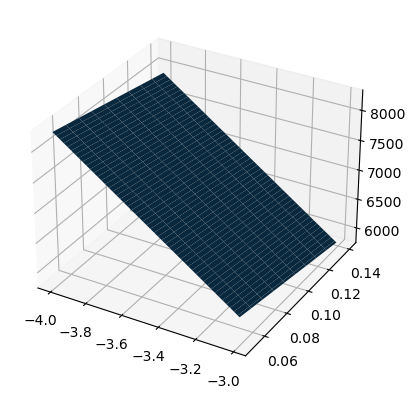

In [127]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

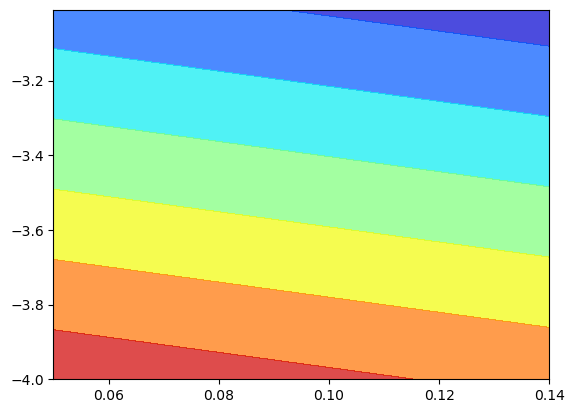

In [128]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

In [129]:
from sklearn import tree


In [3]:

arbol1 = pd.read_excel('Moviles.xlsx')
arbol1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,No,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,Si,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,Si,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,No,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,No,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
arbol1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# Variable Predictoria
x= arbol1.iloc[:,17:20]

#Variable a Predecirt
y= arbol1.iloc[:,3]
x.head()



,three_g,touch_screen,wifi
0,0,0,1
1,1,1,0
2,1,1,0
3,1,0,0
4,1,1,0


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size = 0.75,random_state=0) 


In [8]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1045 to 684
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   three_g       1500 non-null   int64
 1   touch_screen  1500 non-null   int64
 2   wifi          1500 non-null   int64
dtypes: int64(3)
memory usage: 46.9 KB


In [10]:
from sklearn.tree import DecisionTreeClassifier
#Llamamos al constructor del arbol de decision
arbol= DecisionTreeClassifier (max_depth=4)
arbol_enfermedad = arbol.fit (x_train, y_train)

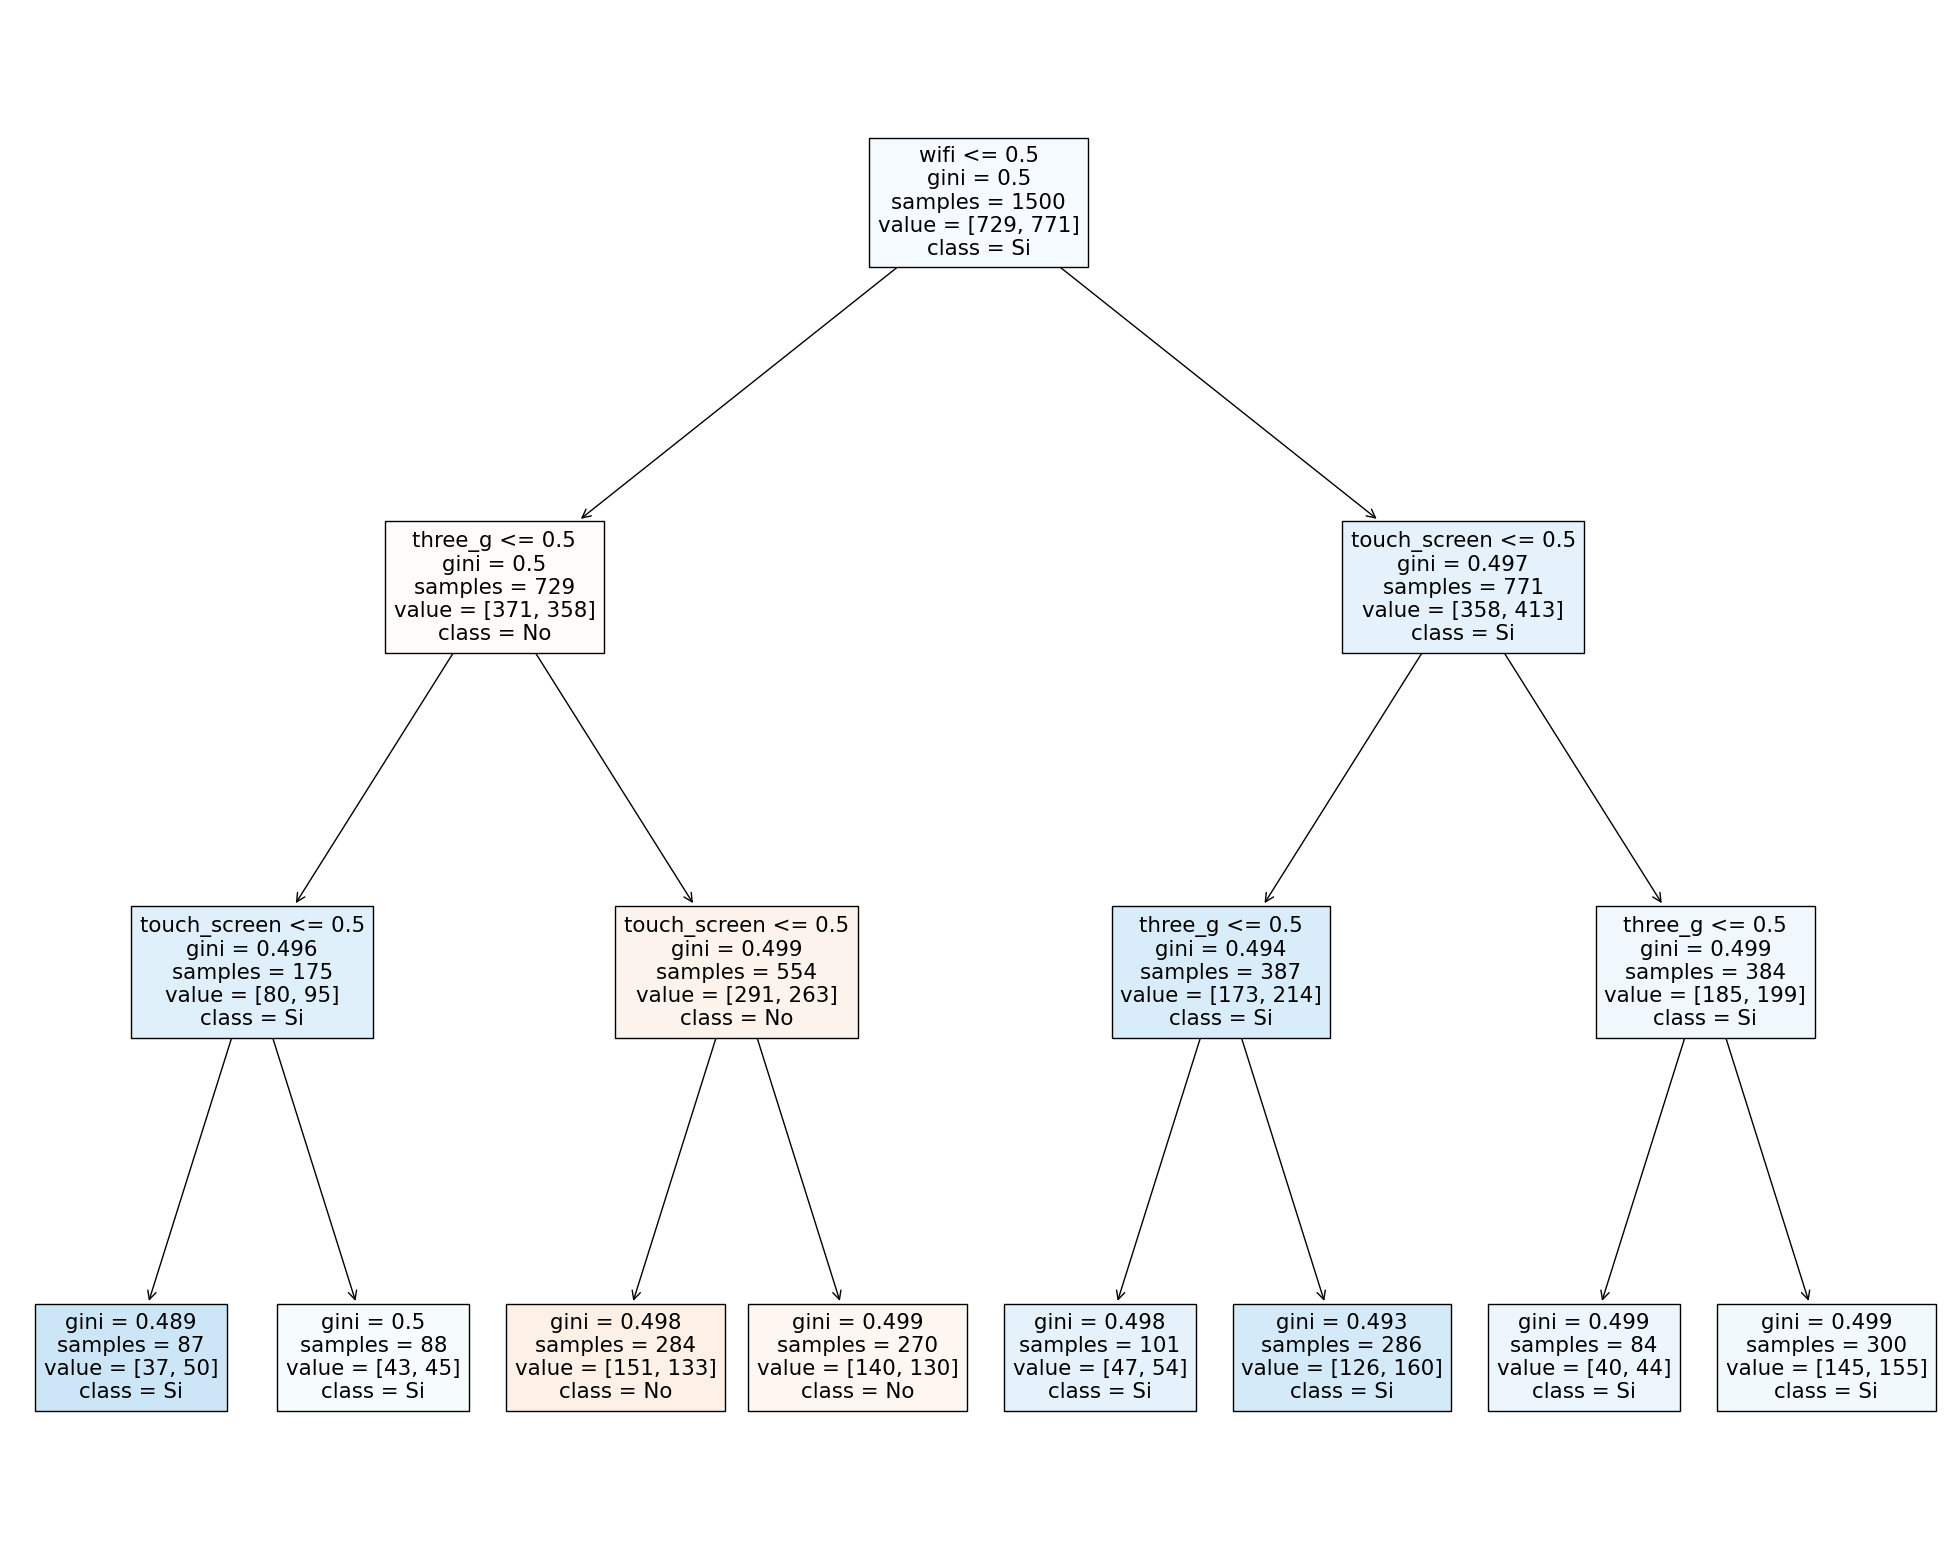

In [11]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20)) #Le indicamos las dimensi ones del gráfico
tree.plot_tree(arbol_enfermedad, feature_names=list (x.columns.values),class_names=list(y.values), filled=True)
plt.show()